#EDA

##Exploratory Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [3]:
df = pd.read_csv('/content/Data.csv')

In [4]:
df.head(5)

,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pysics      466 non-null    int64
 1   Science     466 non-null    int64
 2   Statistics  466 non-null    int64
 3   Math        466 non-null    int64
dtypes: int64(4)
memory usage: 14.7 KB


In [6]:
df.shape

(466, 4)

In [7]:
df.isnull().sum()

Pysics        0
Science       0
Statistics    0
Math          0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pysics,466.0,71.742489,16.033238,0.0,66.00,74.0,82.0,99.0
Science,466.0,72.813305,14.270110,0.0,66.00,74.0,83.0,99.0
Statistics,466.0,73.682403,12.180806,22.0,66.25,74.0,83.0,100.0
Math,466.0,74.540773,11.424528,22.0,67.00,74.0,83.0,99.0


# Data Visualization 

##Data Visualization

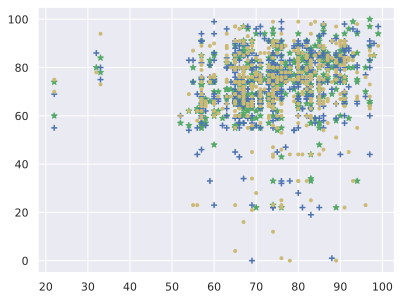

In [ ]:
plt.scatter(df['Math'],df['Statistics'],marker = '*', color = 'g')
plt.scatter(df['Math'],df['Science'],marker = '+', color = 'b')
plt.scatter(df['Math'],df['Pysics'],marker = '.', color = 'y')

<ipython-input-10-bf221cc01eba>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, ' Correlation with each independent variable to target variable Math Heatmap')

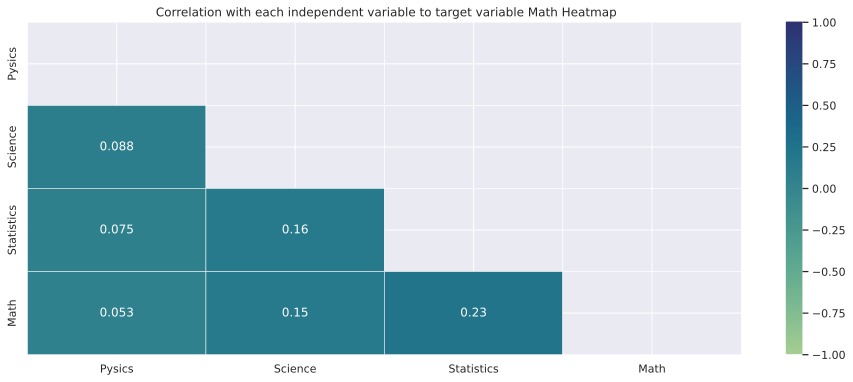

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
#heatmap = sns.heatmap(df.corr()[['Math']].sort_values(by='Math', ascending=False), vmin=-1, vmax=1, cmap="crest", annot=True, linewidths=.5)
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="crest", linewidths=.5)
heatmap.set_title(' Correlation with each independent variable to target variable Math Heatmap')

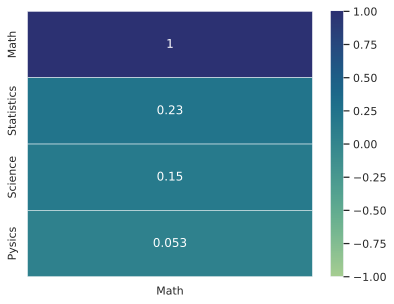

In [ ]:
heatmap = sns.heatmap(df.corr()[['Math']].sort_values(by='Math', ascending=False), vmin=-1, vmax=1, cmap="crest", annot=True, linewidths=.5)

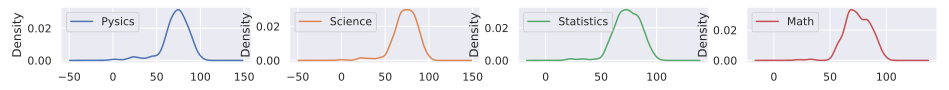

In [ ]:
df.plot(kind='density',subplots=True, layout=(10,5), 
                  sharex=False, figsize=(20,12))
plt.ylabel(' ')
plt.show()

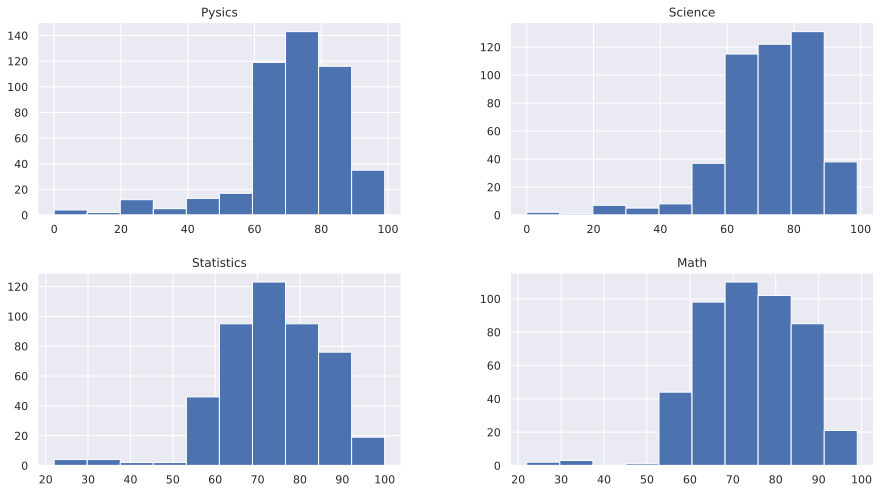

In [ ]:
df.hist(figsize=(15, 8), bins=10)

plt.show()

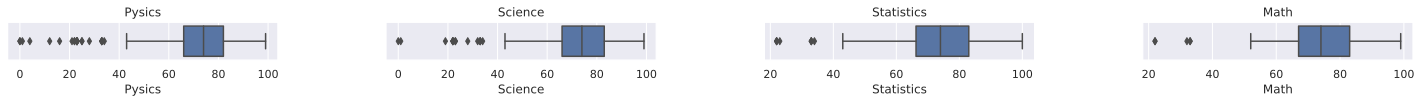

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)
for i, col in enumerate(df):
  ax = fig.add_subplot(25, 5, i+1)
  sns.boxplot(data=df, x=col, ax=ax)
  ax.set_title(f'{col}')
  ax.set_xlabel(f'{col}')

## Data Preprocessing

Outliers Handling

In [15]:
dict={}
for col in df:
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  IQR = percentile75-percentile25
  upper_limit = percentile75+1.5*IQR
  lower_limit = percentile25-1.5*IQR
  dict['upper_limit'+'_'+col] = upper_limit
  dict['lower_limit'+'_'+col] = lower_limit

In [16]:
for col in df:
  df[col]= np.where(
      df[col]>dict['upper_limit_'+col],dict['upper_limit_'+col],
      np.where(
          df[col]<dict['lower_limit_'+col],dict['lower_limit_'+col],df[col]
      )
  )

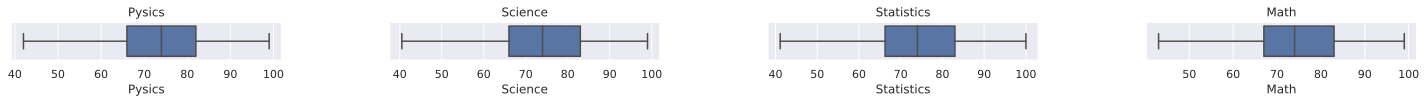

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)
for i, col in enumerate(df):
  ax = fig.add_subplot(25, 5, i+1)
  sns.boxplot(data=df, x=col, ax=ax)
  ax.set_title(f'{col}')
  ax.set_xlabel(f'{col}')

Split Feature and Targeted Feature

In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
st = df.iloc[:,3].values
py = df.iloc[:,1].values
sc = df.iloc[:,2].values

In [ ]:
X.shape


(466, 3)

In [ ]:
y.shape

(466,)

Split Data Set

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


In [18]:
X_train, X_test , y_train, y_test = train_test_split(st,y, test_size=0.2, random_state = 42)


In [19]:
X_train1 = np.reshape(X_train, (-1, 1))
X_test1 = np.reshape(X_test, (-1, 1))

Scalling data

NOTED : there is some interesting happen when using robust scalling with out outlier handling we got better score but with outlier handling we got worse score this need to be explore more

In [16]:
from sklearn.preprocessing import RobustScaler
rb= RobustScaler()
X_train1 = rb.fit_transform(X_train1)
X_test1 = rb.fit_transform(X_test1)

NOTED : normal interaction whe using outlier handling using STD and minmax scalling that it got better with oulier handling

In [20]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_train1 = sc1.fit_transform(X_train1)
X_test1 = sc1.fit_transform(X_test1)


In [165]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
fit_pca = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1'])

In [ ]:
pca = PCA(n_components=1)
fit_pca = pca.fit_transform(X_test)
X_testpca = pd.DataFrame(data = fit_pca, columns = ['PCA_1'])

#Machine Learning Model 

if the score of model machine learning give negative value thats mean the model is not recomended to used for regression model because it means the model is very poorly and really need to make an improve value in R^2/R-Squared score this accur when i used 3 variable response to make ML model

so in this jupyter notebook i run the model used 1 variable response Statistics

##Logistic Regresion

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train1, y_train)
resultLR = LR.score(X_test1, y_test)

In [26]:
print(f'Test score: {resultLR:.2f}')

Test score: 0.26


MSE

In [27]:
y_pred = LR.predict(X_test1)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.5


MAE

In [28]:
from sklearn.metrics import mean_absolute_error
y_pred = LR.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
print("MAE scores:\n", mae)

MAE scores:
 1.9042553191489362


##Decision Tree Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train1, y_train)

DecisionTreeRegressor(random_state=0)

Accuracy

In [22]:
score = dtr.score(X_test1, y_test)
print(f'Test score: {score:.2f}')

Test score: 0.97


MSE

In [23]:
y_pred = dtr.predict(X_test1)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.0


MAE

In [24]:
from sklearn.metrics import mean_absolute_error
y_pred = dtr.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
print("MAE scores:\n", mae)

MAE scores:
 1.4893617021276595


In [51]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = dtr.predict(X_test1)
mape = mean_absolute_error(y_test, y_pred)
print("MAPE scores:\n", mape)

MAPE scores:
 1.4893617021276595


## Random Forest


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train1, y_train) 

RandomForestRegressor(random_state=0)

Accuracy

In [30]:
score = rfr.score(X_test1, y_test)
print(f'Test score: {score:.2f}')

Test score: 0.97


MSE

In [31]:

y_pred = rfr.predict(X_test1)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.0623053191489387


MAE

In [32]:
from sklearn.metrics import mean_absolute_error
y_pred = rfr.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
print("MAE scores:\n", mae)

MAE scores:
 1.5203191489361711


In [53]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = rfr.predict(X_test1)
mape = mean_absolute_error(y_test, y_pred)
print("MAPE scores:\n", mape)

MAPE scores:
 1.5203191489361711


##Multiple Linier Regresion

In [33]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(X_train1, y_train)

LinearRegression()

Accuracy

In [34]:
score = linreg.score(X_test1, y_test)
print(f'Test score: {score:.2f}')

Test score: 0.97


MSE

In [35]:

y_pred = linreg.predict(X_test1)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.9612974923110222


MAE

In [36]:

y_pred = linreg.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
print("MAE scores:\n", mae)

MAE scores:
 1.4604509711670575


##Gradient Boosting Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbt = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbt = gbt.fit(X_train1, y_train)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(y_test, gbt.predict(X_test1))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbt.predict(X_test1)
        print("Accuracy on training set: %.3f" % gbt.score(X_train1, y_train))
        print("Accuracy on test set: %.3f" % gbt.score(X_test1, y_test))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 2.9980
Accuracy on training set: 1.000
Accuracy on test set: 0.967
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 3.0001
Accuracy on training set: 1.000
Accuracy on test set: 0.967
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 3.0000
Accuracy on training set: 1.000
Accuracy on test set: 0.967
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 3.0000
Accuracy on training set: 1.000
Accuracy on test set: 0.967
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 7.3123
Accuracy on training set: 0.858
Accuracy on test set: 0.920
predict output for GradientBoostingRegressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, random_state=0)

gbt = gbt.fit(X_train1, y_train)
print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
mse = mean_squared_error(y_test, gbt.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

pred2 = gbt.predict(X_test1)
print("The best accuracy on training set: %.3f" % gbt.score(X_train1, y_train))
print("The best accuracy on test set: %.3f" % gbt.score(X_test1, y_test))

predict output for GradientBoostingRegressor: learning_rate=0.001, n_estimators=750
The mean squared error (MSE) on test set: 3.0000
The best accuracy on training set: 1.000
The best accuracy on test set: 0.967


In [39]:
score = gbt.score(X_test1, y_test)
print(f'Test score: {score:.2f}')

Test score: 0.97


MAE

In [40]:
y_pred = gbt.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
print("MAE scores:\n", mae)

MAE scores:
 1.4893654145441948


CONCLUSION COTINUOUS DATA NOT RECOMEND TO USE GRADIENT BOOSTING REGRESION BECAUSE SCORE THA IT GIVEN IN R SQUARED/R^2 IS NEGATIVE VALUE WHICH IS IMPOSIBLE TO BE HAPPEN 

## Support Vektor Regressor

SVR

In [42]:
from sklearn.svm import SVR
# create the model object
svr = SVR(kernel = 'rbf')
# fit the model on the data
svr.fit(X_train1, y_train)

SVR()

Accuracy

In [43]:
score = svr.score(X_test1, y_test)
print(f'Test score: {score:.2f}')

Test score: 0.98


MAE

In [44]:

y_pred = svr.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
print("MAE scores:\n", mae)

MAE scores:
 1.2583123457451155


MSE

In [45]:

y_pred = svr.predict(X_test1)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.1345317190435495


##KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train1, y_train)

KNeighborsClassifier()

In [47]:
score = knn.score(X_test1, y_test)
print(f'Test score: {score:.2f}')

Test score: 0.10


MAE

In [48]:

y_pred = svr.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
print("MAE scores:\n", mae)

MAE scores:
 1.2583123457451155


MSE

In [50]:

y_pred = rfr.predict(X_test1)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.0623053191489387
